In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as rcParams


In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df_with_index = df.set_index(['Month'])

In [4]:
df_with_index.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
from datetime import datetime
df_with_index.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


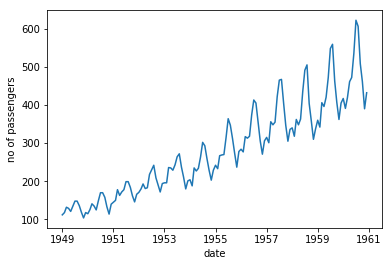

In [6]:
plt.xlabel('date')
plt.ylabel('no of passengers')
plt.plot(df_with_index)


the above graph shows that there is no stationary since the mean is not constant (EG: in 1951 the mean is around 200, but in the year 1959 the mean is around 500) in order to check the stationary we have to find the rolling statistics.

In [7]:
#determining the rolling statistics 
rolling_mean = df_with_index.rolling(window=12).mean()
rolling_std = df_with_index.rolling(window=12).std()

print(rolling_mean, rolling_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

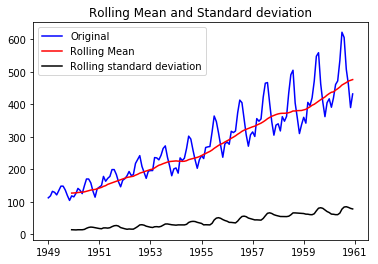

In [8]:
original_data = plt.plot(df_with_index, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling standard deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation')
plt.show()

the red line and the black line in the above graph proves that the mean and standard deviation are not same across data. this visual explanation shows that the data is not stationary. We also perform Dickey Fuller Test to show the data is not stationary below

In [9]:
from statsmodels.tsa.stattools import adfuller
dickey_fuller_test = adfuller(df_with_index['#Passengers'], autolag='AIC')

dickey_fuller_test


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

AIC - akaike information criterion- which gives what we want in time series the exact value and actual value and analyses the difference between them.
here the above output of dickey_fuller_test shows that only numbers and we dont know which number shows which value for that we are creating the pd.series for first four lines and for dictionary value we use something else.


dickey_fuller_output = pd.Series(data=dickey_fuller_test[0:4], index=['Test Statistics', 'p-value', '#lags used',
                                                                      'No of observations used'])
dickey_fuller_output

for key,value in dickey_fuller_output[4].items():
    dickey_fuller_output['Critical value(%s)'%key] = value

print(dickey_fuller_output)

Null hypothesis: our data is not stationary &&&&&&&&
Alternate hypo : our data is stationary

here above values shows that p-value should be less (somewhat around 0.5) but here is high) and also our critical value more than the test statistic value. so our null hypothesis cannot be rejected so we say that data is not stationary

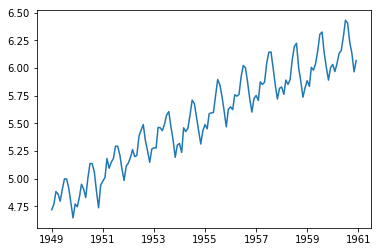

In [14]:
#Estimated trend
logscale_df = np.log(df_with_index)
plt.plot(logscale_df)

here the data is still not stationary but the y-axis shows that value are under log function. by using this we are going to plot moving average using log transformed data

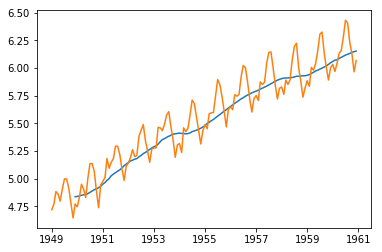

In [15]:
movingAverage = logscale_df.rolling(window=12).mean()
movingSTD = logscale_df.rolling(window=12).std()
plt.plot(movingAverage)
plt.plot(logscale_df)

here the above blue line in the graph shows that the mean is moving with the data so again it is not stationry 

In [16]:
df_logscale_minus_movingAverage = logscale_df - movingAverage
df_logscale_minus_movingAverage.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


now we should remove the NAN values

In [17]:
df_logscale_minus_movingAverage.dropna(inplace=True)
df_logscale_minus_movingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


Now again perform the same dftest on the log transformed data to check the p-value and t-statistic value

In [45]:
from statsmodels.tsa.stattools import adfuller
def test_stationary_with_log_transformed_data(timeseries): 
    movingAverage_log_transformed = timeseries.rolling(window=12).mean()
    movingSTD_log_transformed = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    original_data = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage_log_transformed, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD_log_transformed, color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard deviation')
    plt.show()
    
    #perform dickey fuller test
    print('Dickey Fuller Test')
    dickey_fuller_test_log_transformed = adfuller(timeseries['#Passengers'], autolag='AIC')
    print(dickey_fuller_test_log_transformed)


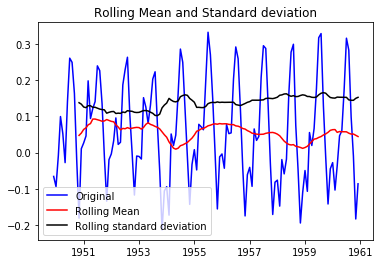

Dickey Fuller Test
(-3.162907991300858, 0.022234630001243844, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747125)


In [46]:
test_stationary_with_log_transformed_data(df_logscale_minus_movingAverage)

Now the red line and the black shows that the mean and the standard devitaion is stationary

the above p-vlaue shows that it is less than 0.5 and t-statistic and t-critical value are almost similar so we can reject null hypothesis and hence the data is not stationary

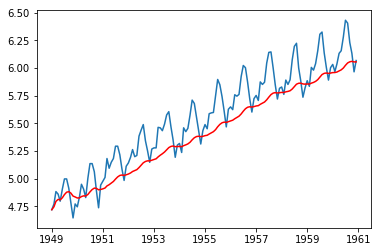

In [47]:
#Weighted Average to to calculate the trend in the time series
exponential_Decay_Weighted_Average = logscale_df.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(logscale_df)
plt.plot(exponential_Decay_Weighted_Average, color='red')

We can see that as the time series is progressive in X and also the average is progressive in the higher side in Y. So we can say that the trend is upwards and it keeps on increasing with time

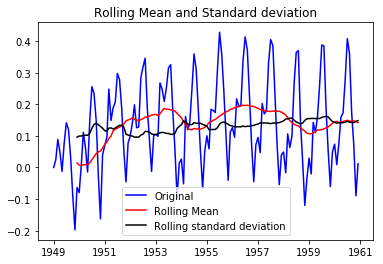

Dickey Fuller Test
(-3.601262420161679, 0.005736938801511851, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -462.8241632483198)


In [48]:
#logscale minus moving exponential weighted decay
dataset_log_scale_minus_Moving_Exponential_Decay_Average = logscale_df - exponential_Decay_Weighted_Average
test_stationary_with_log_transformed_data(dataset_log_scale_minus_Moving_Exponential_Decay_Average)

We can say that the standard deviation is quite flat and also the rolling mean is better than the previous one.

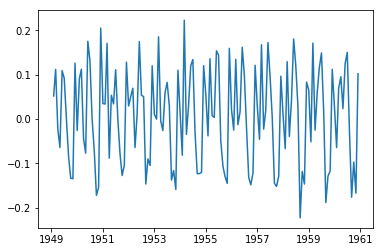

In [49]:
#now we shift the dataset into timeseries
dataset_LOGdiff_Shifting = logscale_df - logscale_df.shift()
plt.plot(dataset_LOGdiff_Shifting)

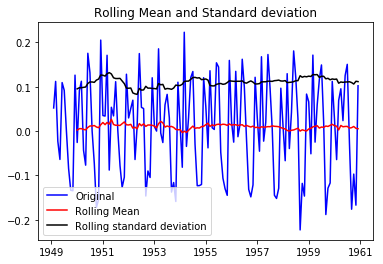

Dickey Fuller Test
(-2.717130598388145, 0.0711205481508568, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -440.35846985568105)


In [50]:
dataset_LOGdiff_Shifting.dropna(inplace=True)
test_stationary_with_log_transformed_data(dataset_LOGdiff_Shifting)

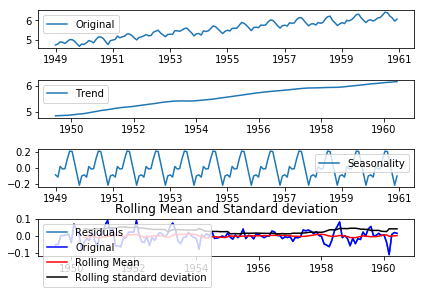

Dickey Fuller Test
(-6.332386797644867, 2.8850589033233625e-08, 9, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, -517.2642969403789)


In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(logscale_df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(logscale_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationary_with_log_transformed_data(decomposed_log_data)


Residuals is nothing but the irregularities in the data

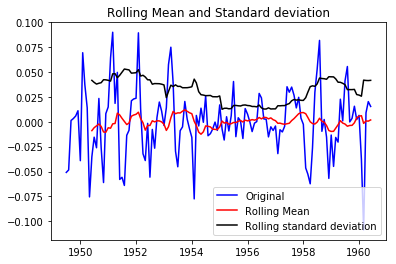

Dickey Fuller Test
(-6.332386797644867, 2.8850589033233625e-08, 9, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, -517.2642969403789)


In [52]:
decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationary_with_log_transformed_data(decomposed_log_data)


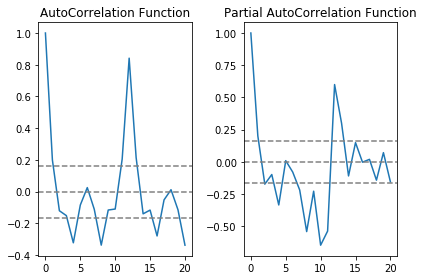

In [55]:
#Correlation and Partial AutoCorrelation graph
from statsmodels.tsa.stattools import acf, pacf

log_acf = acf(dataset_LOGdiff_Shifting, nlags=20)
log_pacf = pacf(dataset_LOGdiff_Shifting, nlags=20, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_LOGdiff_Shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_LOGdiff_Shifting)), linestyle='--', color='gray')
plt.title('AutoCorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(log_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_LOGdiff_Shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_LOGdiff_Shifting)), linestyle='--', color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()



Here in the above graph we have to find the value of P,Q. The above graphs the blue line where it couts the zero line and in both the plots the blue line cuts the zero line at 2. so the value of P=2 in partial autocorrelation, Q=2 in Autocorrelation function

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Plotting AR model


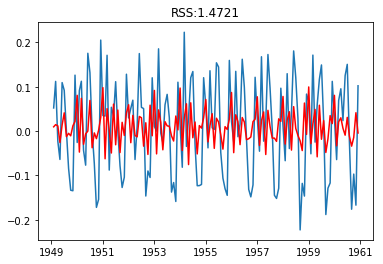

In [69]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model_AR = ARIMA(logscale_df, order=(0,1,2))
results_AR = model_AR.fit(disp=-1)
plt.plot(dataset_LOGdiff_Shifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f' % sum((results_AR.fittedvalues-dataset_LOGdiff_Shifting['#Passengers'])**2))
print('Plotting AR model')

Here order = (2,1,2) - first 2 is P, 1 is differentiate once, second 2 is Q. And in the plot we can see that the RSS is low and it is good and vice versa

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Plotting MA model


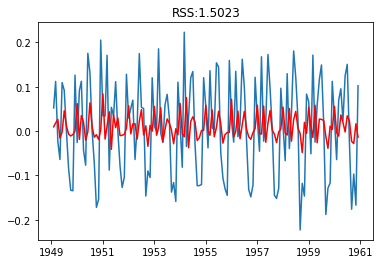

In [66]:
#MA model
model_MA = ARIMA(logscale_df, order=(2,1,0))
results_MA = model_MA.fit(disp=-1)
plt.plot(dataset_LOGdiff_Shifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f' % sum((results_MA.fittedvalues-dataset_LOGdiff_Shifting['#Passengers'])**2))
print('Plotting MA model')

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Plotting ARIMA model


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


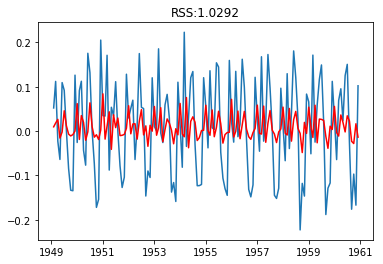

In [68]:
#ARIMA model
model_ARIMA = ARIMA(logscale_df, order=(2,1,2))
results_ARIMA = model_ARIMA.fit(disp=-1)
plt.plot(dataset_LOGdiff_Shifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f' % sum((results_ARIMA.fittedvalues-dataset_LOGdiff_Shifting['#Passengers'])**2))
print('Plotting ARIMA model')

So by combining the AR and MA model we get the ARIMA model by changing the P and Q values and we got less RSS values

In [70]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
1949-12-01    0.037212
1950-01-01    0.068135
1950-02-01    0.089434
1950-03-01    0.090029
1950-04-01    0.066152
1950-05-01    0.044053
1950-06-01    0.035467
1950-07-01    0.003100
1950-08-01   -0.047127
1950-09-01   -0.086353
1950-10-01   -0.098465
1950-11-01   -0.067846
1950-12-01   -0.005228
1951-01-01    0.017385
1951-02-01    0.034016
1951-03-01    0.042561
1951-04-01    0.018748
1951-05-01    0.015260
1951-06-01    0.002489
1951-07-01   -0.012408
                ...   
1958-07-01    0.054477
1958-08-01   -0.016466
1958-09-01   -0.079842
1958-10-01   -0.083143
1958-11-01   -0.058870
1958-12-01   -0.002663
1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036075
1959-

In [72]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [73]:
predictions_ARIMA_log = pd.Series(logscale_df['#Passengers'].ix[0], index=logscale_df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

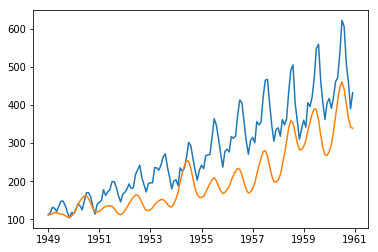

In [76]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_with_index)
plt.plot(predictions_ARIMA)

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


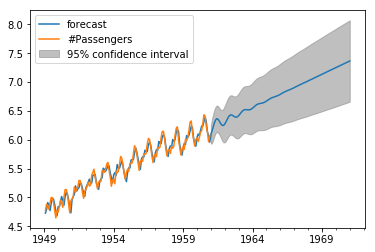

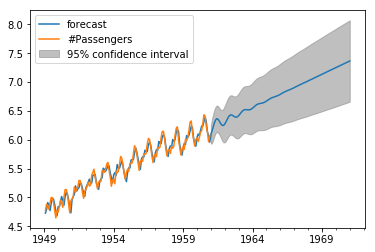

In [77]:
results_ARIMA.plot_predict(1, 264)

here plot_predict(1,264) ---> 264 = 144(given rows) + 120(next ten years)

In [78]:
results_ARIMA.forecast(steps=120)

(array([6.09553406, 6.15281429, 6.22442997, 6.2924113 , 6.34164736,
        6.36359367, 6.35784677, 6.33139285, 6.29597517, 6.26447694,
        6.24738317, 6.25025176, 6.27275854, 6.30940339, 6.35151523,
        6.3898868 , 6.41727396, 6.43011056, 6.42906679, 6.41842471,
        6.40456136, 6.39403601, 6.39183078, 6.4001951 , 6.41833709,
        6.4429543 , 6.46937459, 6.49294005, 6.51024129, 6.51989034,
        6.52267571, 6.52112375, 6.51864515, 6.51853682, 6.52311922,
        6.53322368, 6.54812884, 6.56591575, 6.58410326, 6.60036553,
        6.61313274, 6.62192782, 6.62737784, 6.63093122, 6.63438683,
        6.63937982, 6.64696507, 6.65739849, 6.67015337, 6.68414265,
        6.69806639, 6.71077911, 6.72157738, 6.73033985, 6.73749809,
        6.74386376, 6.75037321, 6.75782594, 6.76668687, 6.77699831,
        6.78841329, 6.80032865, 6.81207205, 6.82308768, 6.83307141,
        6.84202495, 6.85022313, 6.85811222, 6.86617342, 6.87479154,
        6.88416308, 6.89426391, 6.90487898, 6.91

Here we are getting the predictions for the next ten years as step=120(12*10)